In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
%matplotlib inline


In [4]:
# 使用loadmat函数加载.mat文件
raw_data = loadmat('F:/MachineLearning/MachineLearning_HW_CQUT-master/HW4 emsemble/data1.mat')
# 将前两列特征和最后一列目标值读入data中
X=raw_data['X']
y=raw_data['y']
#将数据集按照7:3的比率划分训练集和验证集。
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1,train_size=0.7,test_size=0.3)

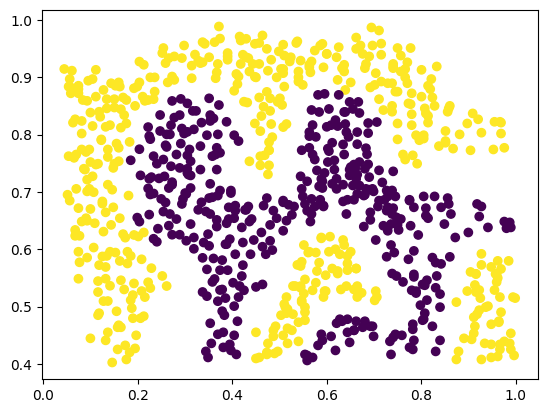

In [5]:
plt.scatter(X[:,0],X[:,1],c=y.flatten())

In [55]:
# 定义SVM模型
model = ensemble.RandomForestClassifier(n_estimators=100,
                                        criterion = 'gini', # {“gini”, “entropy”, “log_loss”}
                                        max_depth=None,
                                        min_samples_split = 2)
# 对模型进行训练
model.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [57]:
y_pred = (model.predict(X_test).reshape(-1, 1))
acc = np.sum(y_pred==y_test)/y_test.shape[0]
print('val_acc:',acc)

val_acc: 0.9845559845559846


In [68]:
# 定义SVM模型
model = ensemble.RandomForestClassifier(n_estimators=3,
                                        criterion = 'gini', # {“gini”, “entropy”, “log_loss”}
                                        max_depth=5,
                                        min_samples_split = 170)
# 对模型进行训练
model.fit(X_train, y_train.ravel())
y_pred = (model.predict(X_test).reshape(-1, 1))
acc = np.sum(y_pred==y_test)/y_test.shape[0]
print('val_acc:',acc)

val_acc: 0.8185328185328186


In [17]:
param_test1 = {'n_estimators':list(range(15,30))}
gsearch1 = GridSearchCV(estimator = ensemble.RandomForestClassifier(oob_score=True,random_state=33), 
                       param_grid = param_test1, scoring='roc_auc',cv=5,n_jobs=-1)
gsearch1.fit(X,y)

c:\Users\ZSY\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=33),
             n_jobs=-1,
             param_grid={'n_estimators': [15, 16, 17, 18, 19, 20, 21, 22, 23,
                                          24, 25, 26, 27, 28, 29]},
             scoring='roc_auc')

({'n_estimators': 19}, 0.8678601688881293)

In [20]:
param_test2 = {'max_depth':list(range(1,14,2)), 'min_samples_split':list(range(50,201,20))}
gsearch2 = GridSearchCV(estimator = ensemble.RandomForestClassifier(n_estimators= 70, oob_score=True, random_state=33),
                        param_grid = param_test2, scoring='roc_auc', cv=5,n_jobs=-1)
gsearch2.fit(X,y)

c:\Users\ZSY\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=70, oob_score=True,
                                              random_state=33),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': [50, 70, 90, 110, 130, 150, 170,
                                               190]},
             scoring='roc_auc')

In [22]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 9, 'min_samples_split': 50}, 0.8172843329915699)

In [61]:
param_test3 = {'n_estimators':list(range(1,100)), 'criterion':['gini', 'entropy', 'log_loss'], 'max_depth':list(range(1,14,2)), 'min_samples_split':list(range(50,201,20))}
gsearch3 = GridSearchCV(estimator = ensemble.RandomForestClassifier(oob_score=True,random_state=42), 
                        param_grid = param_test3, scoring='roc_auc',cv=5,n_jobs=-1)
gsearch3.fit(X,y)

c:\Users\ZSY\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
27720 fits failed out of a total of 83160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
27720 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ZSY\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ZSY\anaconda3\envs\ML\lib\site-packages\sklearn\ensemble\_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "c:\Users\ZSY\anaconda3\envs\ML\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "c

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'min_samples_split': [50, 70, 90, 110, 130, 150, 170,
                                               190],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30, ...]},
             scoring='roc_auc')

In [62]:
gsearch3.best_params_, gsearch3.best_score_

({'criterion': 'gini',
  'max_depth': 5,
  'min_samples_split': 170,
  'n_estimators': 3},
 0.8395123106060606)